In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# טען את הפלט מ-C
X = pd.read_csv("../output/C_output_X_scaled.csv")
y = pd.read_csv("../output/C_output_y.csv") 

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

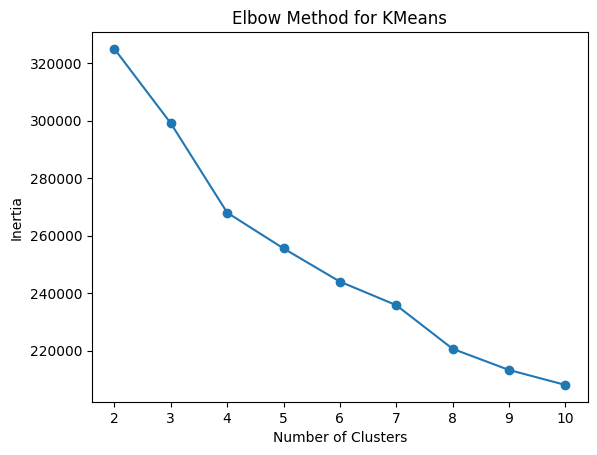

In [5]:
# Elbow method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

Silhouette Score (KMeans): 0.147


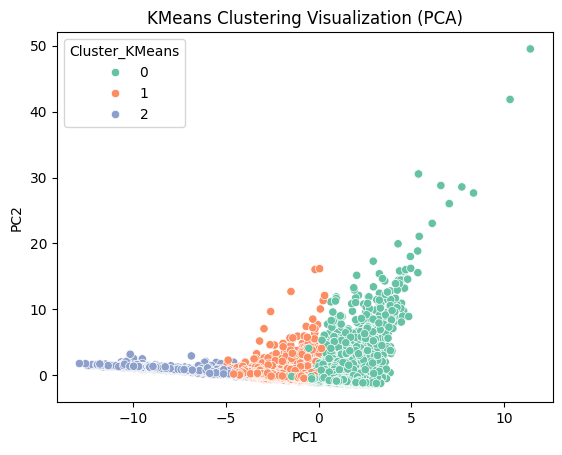

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X)
score_kmeans = silhouette_score(X, clusters_kmeans)
print(f"Silhouette Score (KMeans): {score_kmeans:.3f}")

df_pca["Cluster_KMeans"] = clusters_kmeans
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_KMeans", palette="Set2")
plt.title("KMeans Clustering Visualization (PCA)")
plt.show()

Feature-wise analysis revealed key differences between clusters:

- **Cluster 0**: Characterized by high values of `Fitness_for_Clubs`, `Energy`, and `Loudness_norm`. Likely represents energetic, upbeat, and club-ready songs.
- **Cluster 1**: Shows mid-level values across most features. May represent more general or mixed-content music.
- **Cluster 2**: Markedly low values across energy-related features. Likely includes calmer or acoustic tracks.

Silhouette Score (DBSCAN): -0.272


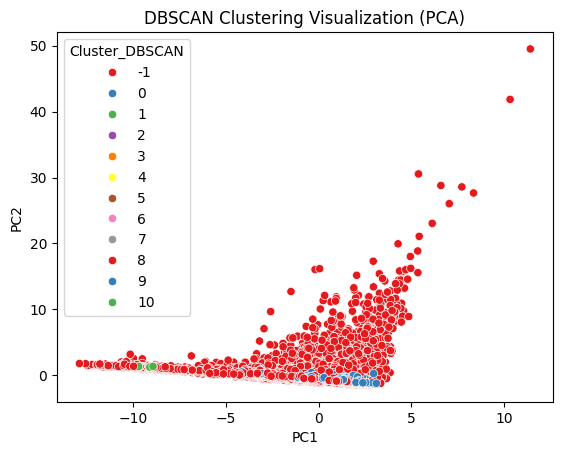

In [7]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
clusters_dbscan = dbscan.fit_predict(X)
score_dbscan = silhouette_score(X, clusters_dbscan) if len(set(clusters_dbscan)) > 1 else -1
print(f"Silhouette Score (DBSCAN): {score_dbscan:.3f}")

df_pca["Cluster_DBSCAN"] = clusters_dbscan
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_DBSCAN", palette="Set1")
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.show()

We also tested DBSCAN clustering. However, the algorithm classified nearly all points as noise (`-1`), indicating that the dataset does not exhibit clear density-based clusters in its current form.

This suggests that DBSCAN may not be well-suited for this data without substantial parameter tuning or feature transformation.

We applied KMeans clustering to the dataset using k=3, selected based on the Elbow Method.  
The resulting Silhouette Score was 0.147, suggesting a moderate level of cluster separation.  
PCA-based visualization shows three fairly distinct clusters in a 2D space.

In [8]:
# ניתוח סטטיסטי של פיצ'רים לפי הקלאסטרים (למשל של KMeans)
X["Cluster_KMeans"] = clusters_kmeans
mean_by_cluster = X.groupby("Cluster_KMeans").mean()
mean_by_cluster.T.sort_values(by=0, ascending=False).head(10)  # הפיצ'רים הכי תורמים לקלאסטר 0

Cluster_KMeans,0,1,2
Fitness_for_Clubs,0.514067,-0.762179,-3.134363
Energy,0.495098,-0.832972,-2.276394
Loudness_norm,0.418243,-0.498745,-3.460853
Loudness,0.418243,-0.498745,-3.460853
Valence,0.325861,-0.546221,-1.513427
Danceability,0.304405,-0.445192,-1.902049
Speechiness,0.112496,-0.196604,-0.462193
Unnamed: 0,0.112259,-0.199309,-0.437792
Likes,0.090044,-0.164040,-0.319847
Views,0.086352,-0.156652,-0.311706


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

# לא חובה להגיד שזה פיצוח של המשימה, אבל אפשר לראות אם יש חפיפה
confusion = pd.crosstab(y["Target"], clusters_kmeans, rownames=["Target"], colnames=["Cluster"])
print(confusion)

Cluster     0     1    2
Target                  
0        9830  4835  723
1        3725  1071   64


We compared the clustering results to the original `Target` labels (single vs. album).  
The distribution of singles across clusters was as follows:

- Cluster 0: ~27.5% singles  
- Cluster 1: ~18.1% singles  
- Cluster 2: ~8.1% singles

This suggests that high-energy and danceable songs (Cluster 0) are more likely to be released as singles.

In Section D, we explored unsupervised clustering methods to identify song groupings based on musical and popularity features.

KMeans clustering with k=3 revealed meaningful structure, with clusters distinguishable both numerically and visually via PCA.  
Key musical features such as `Fitness_for_Clubs`, `Energy`, and `Danceability` drove the cluster separation.

We observed a potential connection between these clusters and the original label (single vs. album), especially in Cluster 0.  
DBSCAN did not yield interpretable clusters under current settings.

Overall, this analysis provides insight into the underlying structure of the music dataset and highlights directions for further supervised learning.